# Korean word 2350
총 두 종류의 Dataset Class를 만들 것이다.

---

## 1. 다용도로 사용될 Dataset (임베딩 등)

- Image Vector
- Label (예: 102 index / one-hot)
- split 없이 2350의 길이를 갖는 데이터셋
- 107 * 2350 = 251450개가 만들어질 것
- 파일 이름은 '{폰트 인덱스}_{글자 인덱스}' <br/>
    예) 108_2340.png
    


In [1]:
import os
import glob

In [2]:
words = []
with open('./dataset/kor/korean_2350.txt', 'r', encoding='cp949') as f:
    kor_words = f.read()
    for kor_word in kor_words:
        words.append(kor_word)

In [3]:
words = sorted(words)

In [4]:
words[:10]

['가', '각', '간', '갇', '갈', '갉', '갊', '감', '갑', '값']

In [5]:
len(words)

2350

In [6]:
fonts = []
for font in glob.glob('collection/fonts_kor/*.ttf'):
    fonts.append(font[21:])

In [7]:
fonts = sorted(fonts)

In [8]:
fonts[:10]

['나눔손글씨 가람연꽃.ttf',
 '나눔손글씨 갈맷글.ttf',
 '나눔손글씨 강부장님체.ttf',
 '나눔손글씨 강인한 위로.ttf',
 '나눔손글씨 고딕 아니고 고딩.ttf',
 '나눔손글씨 고려글꼴.ttf',
 '나눔손글씨 곰신체.ttf',
 '나눔손글씨 규리의 일기.ttf',
 '나눔손글씨 금은보화.ttf',
 '나눔손글씨 기쁨밝음.ttf']

In [9]:
len(fonts)

109

In [18]:
# 하나손글씨, 동화또박 제거
fonts.remove('나눔손글씨 동화또박.ttf')
fonts.remove('나눔손글씨 하나손글씨.ttf')

In [24]:
len(fonts)

107

---
### 폰트별 이미지 생성
gitignore 처리됨

In [2]:
from PIL import Image,ImageDraw,ImageFont

In [25]:
def save_kor_font_word(word, canvas_size, font_style, file_name):
    canvas = Image.new('L', (canvas_size, canvas_size), color=255)
    draw = ImageDraw.Draw(canvas)
    
    font_style = './collection/fonts_kor/' + font_style
    try:
        font = ImageFont.truetype(font_style, size=80) # 150
        w, h = draw.textsize(word, font=font)    
        draw.text(((canvas_size-w)/2,(canvas_size-h)/5), word, fill=(0), font=font)

        canvas.save(file_name, "PNG")
    except Exception as e:
        print(font_style + '(' + word + ')' + ' : ' + str(e))

In [27]:
canvas_size = 128
for (idx, font) in enumerate(fonts):
    for (jdx, word) in enumerate(words):
        filename = './collection/img/korean/{}_{}.png'.format(idx, jdx)
        save_kor_font_word(word, canvas_size, font, filename)

In [29]:
len(glob.glob('./collection/img/korean/*.png')) # 107*2350

251450

---
### obj 파일로 변환

In [3]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from __future__ import absolute_import

import argparse
import glob
import os
import pickle as pickle
import random
import torch

def pickle_examples_kor(from_dir, train_path):
    """
    Compile a list of examples into pickled format, so during
    the training, all io will happen in memory
    """
    paths = glob.glob(os.path.join(from_dir, '*.png')) # 카테고리 폴더 내 모든 png 파일
    with open(train_path, 'wb') as ft:
        train_count = 0
        
        for p in sorted(paths):
            label = os.path.basename(p) # 파일 이름을 저장(한글 이름이 저장될 것))
            with open(p, 'rb') as f:
                img_bytes = f.read()
                r = random.random()
                example = (label, img_bytes)
                
                # pickle.dump(example, ft)
                torch.save(example, ft)
                train_count += 1
    print('{} imgs saved in train.obj, end'.format(train_count))
    return

In [31]:
from_dir = './collection/img/korean/'
save_dir_kor = './dataset/kor/latent.obj'

In [34]:
pickle_examples_kor(from_dir, save_dir_kor)

251450 imgs saved in train.obj, end


---
### 샘플 출력
font의 기본 정보만을 보여주는 새로운 클래스를 사용

In [2]:
from common.dataset import PickledImageProvider
from common.dataset import LatentInfo
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
directory = 'dataset/kor/latent.obj'
dset = LatentInfo(PickledImageProvider(directory))

processed 10000 examples
processed 20000 examples
processed 30000 examples
processed 40000 examples
processed 50000 examples
processed 60000 examples
processed 70000 examples
processed 80000 examples
processed 90000 examples
processed 100000 examples
processed 110000 examples
processed 120000 examples
processed 130000 examples
processed 140000 examples
processed 150000 examples
processed 160000 examples
processed 170000 examples
processed 180000 examples
processed 190000 examples
processed 200000 examples
processed 210000 examples
processed 220000 examples
processed 230000 examples
processed 240000 examples
processed 250000 examples
processed 260000 examples
processed 270000 examples
processed 280000 examples
processed 290000 examples
processed 300000 examples
processed 310000 examples
processed 320000 examples
processed 330000 examples
processed 340000 examples
processed 350000 examples
processed 360000 examples
processed 370000 examples
processed 380000 examples
processed 390000 exam

In [8]:
dset[4]

({'font_index': 0, 'word_index': 1000}, array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]))

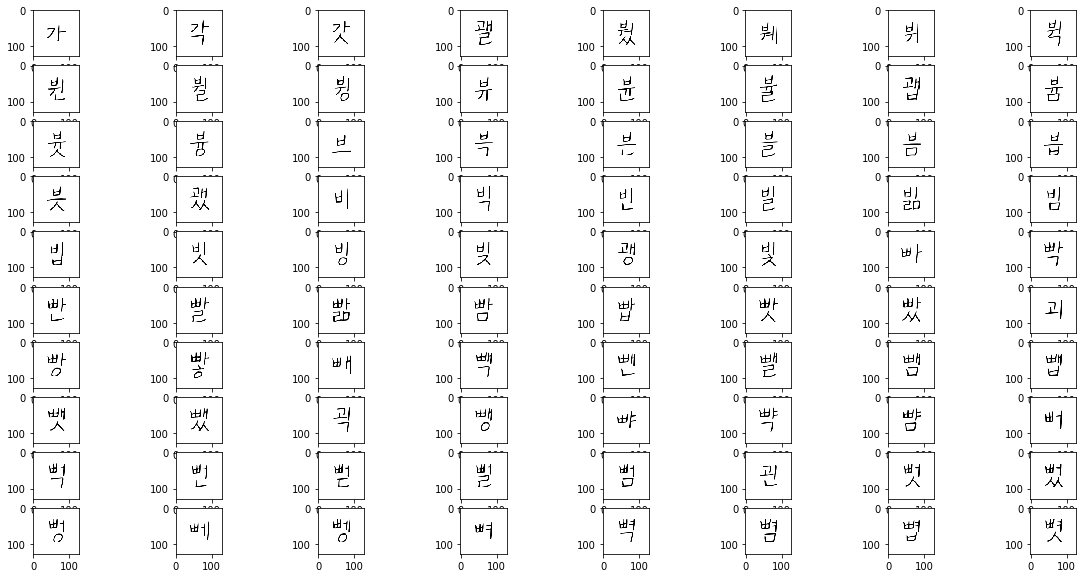

In [8]:
plt.figure(figsize=(20, 10))
for idx in range(80):
    plt.subplot(10, 8, idx+1)
    plt.imshow(dset[idx][1], cmap='gray', label=idx)
plt.show()

In [9]:
len(dset)

251450

In [10]:
dset[0]

({'font_index': '0', 'word_index': '0'}, array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]))

---

## 2. 학습 input으로 사용할 Dataset
기존 알파벳 클래스와 동일한 형태이다.

- info (Category, Font, Alphbet Vector)
- Normalized Image Vector
- Length <br/>

\** 여기서 Category는 폰트 소개글을 **doc2vec** 으로 벡터화한 array


In [5]:
import pandas as pd

In [2]:
vec_10 = pd.read_csv('./dataset/kor/doc2vec_10.csv')
vec_20 = pd.read_csv('./dataset/kor/doc2vec_20.csv')

In [9]:
# 불필요한 col 제거
del vec_10['Unnamed: 0']
del vec_20['Unnamed: 0']

In [15]:
# 폰트 2개 제거 (동화또박, 하나손글씨)
fonts_ = []
for font in glob.glob('collection/fonts_kor/*.ttf'):
    fonts_.append(font[21:])
fonts_ = sorted(fonts_)
print(len(fonts_))

109


In [19]:
print(fonts_.index('나눔손글씨 동화또박.ttf'))
print(fonts_.index('나눔손글씨 하나손글씨.ttf'))

25
98


In [27]:
vec_10 = vec_10.drop(vec_10.index[25])
vec_10 = vec_10.drop(vec_10.index[98])

vec_20 = vec_20.drop(vec_20.index[25])
vec_20 = vec_20.drop(vec_20.index[98])

In [34]:
len(vec_10), len(vec_20)

(107, 107)

In [32]:
vec_10 = vec_10.reset_index(drop=True)
vec_20 = vec_20.reset_index(drop=True)

In [41]:
vec_10.head()

,0,1,2,3,4,5,6,7,8,9
0,2.240306,-1.475606,-0.593018,-0.186053,-1.238121,-1.161201,2.825502,0.104548,-0.162606,1.244091
1,2.942392,-0.445651,0.126527,0.755254,0.551925,-1.148455,2.546840,0.973373,0.363425,-0.144590
2,1.643001,-0.036200,-0.634073,0.196796,1.255635,-0.165385,3.187310,0.790376,-0.458148,-0.272628
3,-0.051245,-1.362451,-1.131412,0.255749,-0.740814,0.042423,0.695882,0.429361,0.474149,0.967398
4,1.715632,-0.501285,-0.627680,-0.149941,-0.792681,-2.257432,2.061397,1.927317,-0.604404,-1.484109


In [42]:
vec_20.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.139612,-0.475844,-0.279889,2.139267,-0.868456,0.193137,0.767907,1.177472,-0.169784,-0.100220,-2.292682,-1.539565,0.152523,0.659306,-0.520745,-0.788073,-0.849790,1.241254,0.022203,1.483191
1,0.409611,-1.284890,0.127853,0.483794,-0.027437,-1.207612,1.373138,1.169086,0.275809,-0.075385,-1.748617,-0.795543,-0.985126,-0.500603,0.182111,-0.684201,-0.549343,2.804942,-1.504206,0.540331
2,0.577238,-0.721962,-0.145060,1.522448,0.975075,-0.080042,2.322346,1.263790,-1.067199,0.010968,-1.114479,-0.826270,0.919472,1.471578,0.551342,0.729127,1.176047,2.077337,-0.204046,0.628581
3,-0.669256,-0.571597,-0.142982,0.120304,1.198266,0.504896,-0.307708,1.358834,0.889523,0.334650,-1.297366,-0.057930,0.148015,0.291184,-0.342102,-1.724088,1.123995,0.657151,1.659118,1.848350
4,0.350377,0.017077,-0.270383,0.901961,0.067628,-2.807260,0.162656,0.474836,0.348140,-1.482647,-2.563525,-1.019836,-0.340324,1.043325,1.533627,-0.230656,-1.488491,1.081287,0.162969,1.032377


In [47]:
# doc2vec sample
vec_10.loc[vec_10.index[0]].tolist()

[2.2403063999999997,
 -1.4756056999999998,
 -0.593018,
 -0.18605323,
 -1.2381212,
 -1.161201,
 2.8255024,
 0.10454782,
 -0.16260550000000001,
 1.2440913999999998]

---
### 한글 폰트 이미지를 train, val, test로 분리하기
- train / val / test = 0.8 / 0.15 / 0.05
- 폰트 개수를 기준으로 분리한다. 

In [18]:
import numpy as np

In [10]:
r_train = 0.8
r_val   = 0.15
r_test  = 0.05

directory = './collection/img/korean/'

In [14]:
def extract_filename(path):
    filenames = []
    for filename in sorted(glob.iglob(path + '*.png')): # sort
        filenames.append(filename[24:])
    return filenames

def split_each_font(size, splt_test, splt_val):
    test = int(np.floor(splt_test * size))
    val  = int(np.floor((splt_test + splt_val) * size))
    return test, val

def get_idx_sampler(size, splt_test, splt_val):
    idx = list(range(size))
    train_idxs = idx[splt_val:]
    val_idxs   = idx[splt_test: splt_val]
    test_idxs  = idx[: splt_test]
    return train_idxs, val_idxs, test_idxs

In [25]:
file_size = int(len(glob.glob(directory+'*.png')) / 2350)
file_size

107

In [26]:
kor_test, kor_val = split_each_font(file_size, r_test, r_val)
kor_num_train, kor_num_val, kor_num_test = get_idx_sampler(file_size, kor_test, kor_val)

In [27]:
print('train: {}개'.format(len(kor_num_train)))
print('valid: {}개'.format(len(kor_num_val)))
print('test : {}개'.format(len(kor_num_test)))
print('split ratio = 0.8 / 0.15 / 0.05')

train: 86개
valid: 16개
test : 5개
split ratio = 0.8 / 0.15 / 0.05


즉, 데이터셋의 개수는
- train: 86 * 2350 = 202,100개
- valid: 16 * 2350 = 37,600개
- test :  5 * 2350 = 11,750개

---

### 한글 폰트 이미지 폴더 분리하기 

In [26]:
import shutil
def move_img(purpose, fromDir, toDir, filename):
    fromDir += filename
    toDir   += purpose + '/' + filename
    shutil.move(fromDir, toDir)

In [18]:
from_dir = 'collection/img/korean/'
to_dir = 'collection/img/korean/'

In [27]:
# split train
for (idx, img) in enumerate(sorted(glob.glob('collection/img/korean/*.png'))):
    img_name = img[22:]
    num_file = len(kor_num_train) * 2350
    move_img('train', from_dir, to_dir, img_name)
    if idx+1 == num_file:
        break

In [28]:
# split val
for (idx, img) in enumerate(sorted(glob.glob('collection/img/korean/*.png'))):
    img_name = img[22:]
    num_file = len(kor_num_val) * 2350
    move_img('val', from_dir, to_dir, img_name)
    if idx+1 == num_file:
        break

In [29]:
# split test
for (idx, img) in enumerate(sorted(glob.glob('collection/img/korean/*.png'))):
    img_name = img[22:]
    num_file = len(kor_num_test) * 2350
    move_img('test', from_dir, to_dir, img_name)
    if idx+1 == num_file:
        break

In [32]:
print(len(glob.glob('collection/img/korean/{}/*.png'.format('train'))))
print(len(glob.glob('collection/img/korean/{}/*.png'.format('val'))))
print(len(glob.glob('collection/img/korean/{}/*.png'.format('test'))))

202100
37600
11750


---
### train, val, test obj 파일 만들기

In [35]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from __future__ import absolute_import

import argparse
import glob
import os
import pickle as pickle
import random
import torch

def pickle_examples_split_korean(from_dir, train_path):
    """
    Compile a list of examples into pickled format, so during
    the training, all io will happen in memory
    """
    paths = glob.glob(os.path.join(from_dir, '*.png'))
    with open(train_path, 'wb') as ft:
        train_count = 0
        
        for p in sorted(paths): # sorted 추가!!
            label = os.path.basename(p) # 파일 이름을 저장(추후 DataSet에서 분리)
            with open(p, 'rb') as f:
                img_bytes = f.read()
                r = random.random()
                example = (label, img_bytes)
                
                # pickle.dump(example, ft)
                torch.save(example, ft)
                train_count += 1
    print('{} imgs saved in .obj, end'.format(train_count))
    return

In [34]:
save_dir = './dataset/kor/'

In [36]:
# train.obj
from_dir = './collection/img/korean/train'
target = os.path.join(save_dir, 'train.obj')
pickle_examples_split_korean(from_dir, target)

# val.obj
from_dir = './collection/img/korean/val'
target = os.path.join(save_dir, 'val.obj')
pickle_examples_split_korean(from_dir, target)

# test.obj
from_dir = './collection/img/korean/test'
target = os.path.join(save_dir, 'test.obj')
pickle_examples_split_korean(from_dir, target)

202100 imgs saved in .obj, end
37600 imgs saved in .obj, end
11750 imgs saved in .obj, end


### KoreanFontDataset을 약간 변형해보자
만들어져 있는 obj 파일에 정보를 추가하기 위해서 get_doc2vec이라는 함수를 ~~때려박~~ 추가하기로 한다..

In [60]:
from common.dataset import KoreanFontDataset
from common.dataset import PickledImageProvider
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
path = 'dataset/kor/'

dset_kor_train = KoreanFontDataset(PickledImageProvider(path + 'train.obj'), vector_size=10)
dset_kor_val   = KoreanFontDataset(PickledImageProvider(path + 'val.obj'), vector_size=10)
dset_kor_test  = KoreanFontDataset(PickledImageProvider(path + 'test.obj'), vector_size=10)

processed 1000 examples
processed 2000 examples
processed 3000 examples
processed 4000 examples
processed 5000 examples
processed 6000 examples
processed 7000 examples
processed 8000 examples
processed 9000 examples
processed 10000 examples
processed 11000 examples
processed 12000 examples
processed 13000 examples
processed 14000 examples
processed 15000 examples
processed 16000 examples
processed 17000 examples
processed 18000 examples
processed 19000 examples
processed 20000 examples
processed 21000 examples
processed 22000 examples
processed 23000 examples
processed 24000 examples
processed 25000 examples
processed 26000 examples
processed 27000 examples
processed 28000 examples
processed 29000 examples
processed 30000 examples
processed 31000 examples
processed 32000 examples
processed 33000 examples
processed 34000 examples
processed 35000 examples
processed 36000 examples
processed 37000 examples
processed 38000 examples
processed 39000 examples
processed 40000 examples
processed

In [39]:
dset_kor_train[0]

({'font_index': 0,
  'font_doc2vec': [2.2403063999999997,
   -1.4756056999999998,
   -0.593018,
   -0.18605323,
   -1.2381212,
   -1.161201,
   2.8255024,
   0.10454782,
   -0.16260550000000001,
   1.2440913999999998],
  'word_index': 0},
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]))

In [58]:
dset_kor_train[2350]

({'font_index': 100,
  'font_doc2vec': [3.9679849999999997,
   0.37499157,
   -1.1921877,
   -0.08951897,
   -0.39531785,
   -1.4820191,
   2.7595475,
   -0.23536336,
   -0.6430179,
   0.47958950000000006],
  'word_index': 0},
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]))

In [51]:
dset_kor_val[4]

({'font_index': 81,
  'font_doc2vec': [2.28855,
   0.038262524,
   0.9085788,
   0.69105166,
   0.19035381,
   -0.07655508,
   2.7751813,
   -0.31423090000000004,
   0.2921709,
   0.91878444],
  'word_index': 1000},
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]))

In [59]:
dset_kor_test[11700]

({'font_index': 9,
  'font_doc2vec': [2.1376863,
   0.17898785,
   0.20647807,
   0.35320556,
   -0.65753645,
   -0.8326411,
   1.8536247,
   1.5947604,
   -0.18710244,
   0.32108796],
  'word_index': 954},
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]))

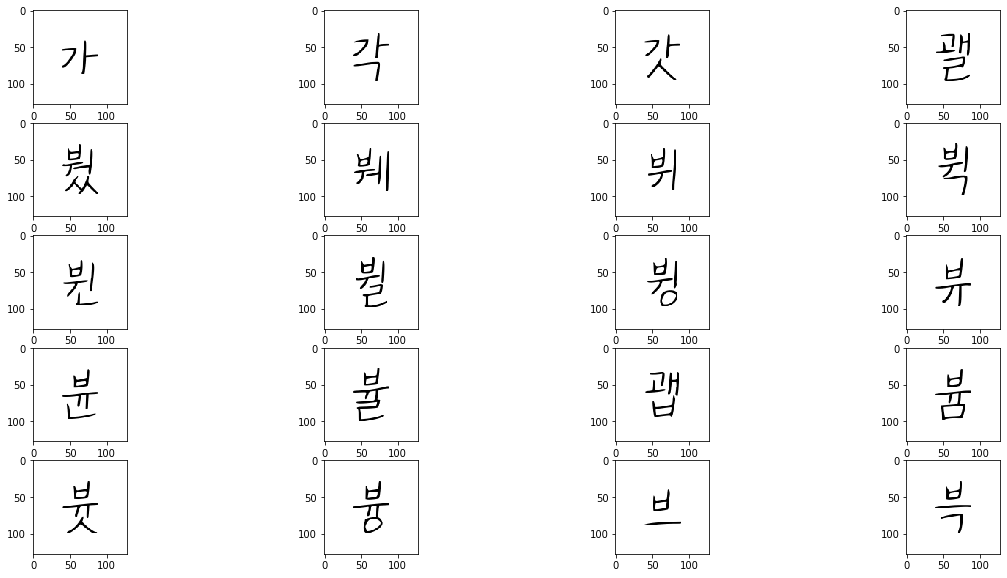

In [61]:
# train
plt.figure(figsize=(20, 10))
for idx in range(20):
    plt.subplot(5, 4, idx+1)
    plt.imshow(dset_kor_train[idx][1], cmap='gray', label=idx)
plt.show()

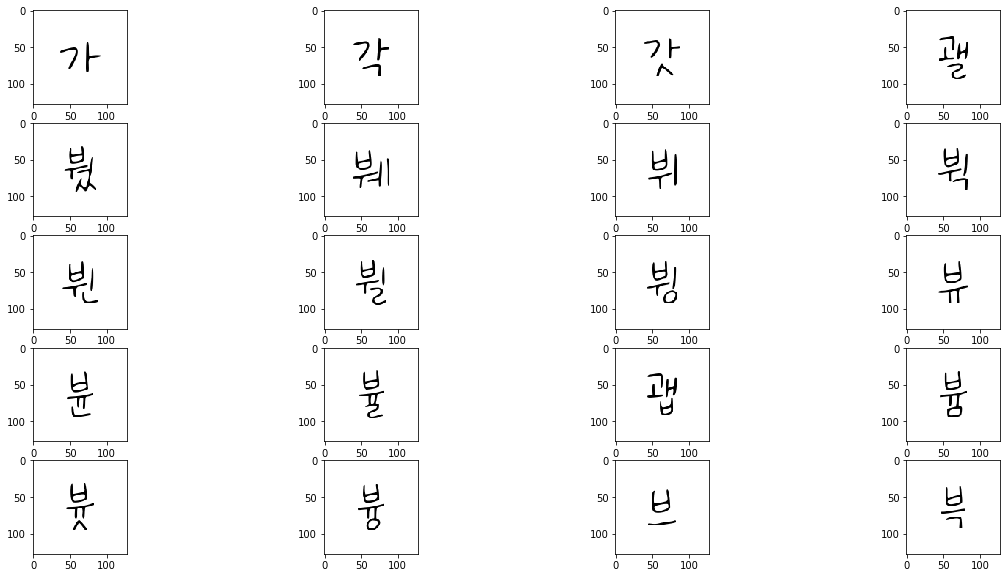

In [62]:
# val
plt.figure(figsize=(20, 10))
for idx in range(20):
    plt.subplot(5, 4, idx+1)
    plt.imshow(dset_kor_val[idx][1], cmap='gray', label=idx)
plt.show()

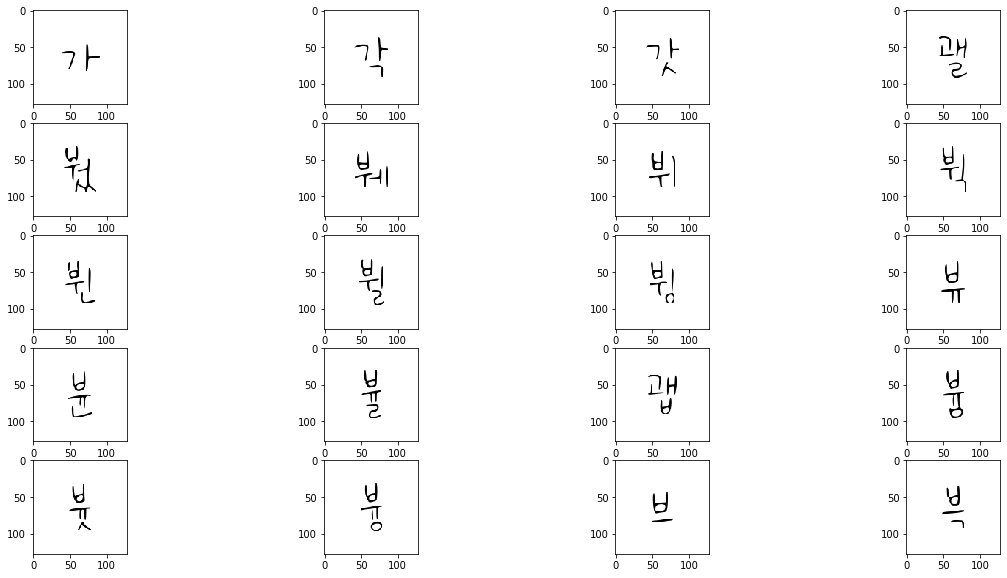

In [63]:
# test
plt.figure(figsize=(20, 10))
for idx in range(20):
    plt.subplot(5, 4, idx+1)
    plt.imshow(dset_kor_test[idx][1], cmap='gray', label=idx)
plt.show()

---
# 정리
두 가지 데이터셋을 만들었다.

## 1. 다용도로 사용될 Dataset (임베딩 등)
    - dataset.LatentInfo 클래스 사용
    - 폰트와 단어의 index, 그리고 이미지를 반환

## 2. 학습 input으로 사용할 Dataset
    - dataset.KoreanFontDataset 클래스 사용 
        (vector_size 명시 필요, default = 10)
    - 폰트와 단어의 index, doc2vec, 그리고 이미지를 반환